In [2]:
#Jake's Notebook

##### Import City ######

import pandas as pd
import sqlite3
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns

##### Cleaning Up This Disgusting Data %%%%%%
df = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/zippedData/tn.movie_budgets.csv.gz')
df.drop(df.domestic_gross.name, axis=1, inplace=True)
df.drop(df.id.name, axis=1, inplace=True)
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
df['production_budget'] = df['production_budget'].astype(str)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df.worldwide_gross = pd.to_numeric(df.worldwide_gross, errors='coerce')
df.production_budget = pd.to_numeric(df.production_budget, errors='coerce')
df = df.rename(columns={'production_budget': 'Budget', 'worldwide_gross': 'Total Gross', 'movie': 'Title', 'release_date': 'Year'})
df['Year'] = pd.to_datetime(df['Year'])
df['Released'] = df['Year'].dt.year
df.drop(df.Year.name, axis=1, inplace=True)
df['Profit'] = df['Total Gross']-df['Budget']
df['Pure Profit'] = df['Profit']/df['Budget']
df['Pure Profit'] = df['Pure Profit']*100
df.drop(df.Profit.name, axis=1, inplace=True)

##### Printing the Top 10 most profitable movies #####
df = df.reset_index(drop=True)
df = df.loc[df["Released"] >=2017 ]
df = df.loc[df["Pure Profit"] >=1540]
df.sort_values(['Pure Profit'], ascending=[False])
df.sort_values(['Pure Profit'], ascending=[0], inplace=True)
df

,Title,Budget,Total Gross,Released,Pure Profit
4249,Split,5000000,278964806,2017,5479.296120
4248,Get Out,5000000,255367951,2017,5007.359020
5685,A Ghost Story,100000,2769782,2017,2669.782000
4590,Truth or Dare,3500000,95127344,2018,2617.924114
3535,Halloween,10000000,254900667,2018,2449.006670
4257,Happy Death Day,5000000,125010260,2017,2400.205200
3001,Annabelle: Creation,15000000,305384865,2017,1935.899100
1623,It,35000000,697457969,2017,1892.737054
2865,A Quiet Place,17000000,334522294,2018,1867.778200
3544,Insidious: The Last Key,10000000,167885588,2018,1578.855880


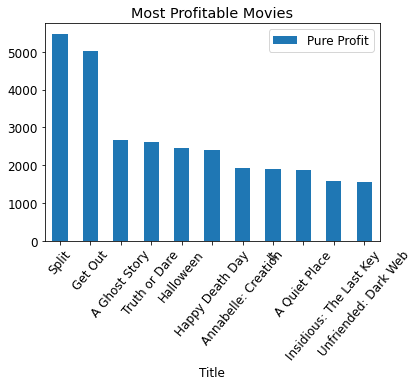

In [482]:
###### Creating a bar chart #######

df.plot.bar(x="Title", y="Pure Profit", rot=50, title="Most Profitable Movies");
plot.show(block=True);

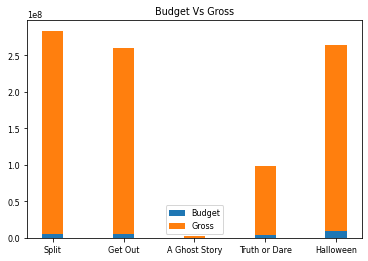

In [485]:
plot.rcParams['font.size'] = 8.0

labels = ['Split', 'Get Out', 'A Ghost Story', 'Truth or Dare', 'Halloween']
men_means = [5000000, 5000000, 100000, 3500000, 10000000]
women_means = [278964806, 255367951, 2769782, 95127344, 254900667]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.30      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Budget')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Gross')


ax.set_title('Budget Vs Gross')
ax.legend()

plt.show()

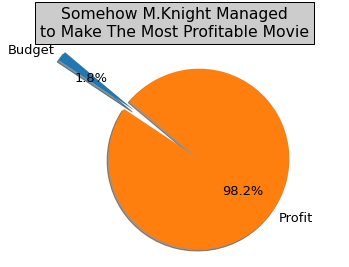

In [489]:
##### Useless Piechart / Unsubtle Shyamalan dig #####


plot.rcParams['font.size'] = 13.0
labels = 'Budget', 'Profit'
sizes = [5000000, 278964806]
explode = (0.9, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Somehow M.Knight Managed\n" + "to Make The Most Profitable Movie", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
